In [58]:
%matplotlib widget

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas

In [60]:
# Take in all of our traveler data and read it into pandas

world_energy_df = pd.read_csv("Resources/world_energy_consumption.csv")
world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [61]:
world_energy_df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [62]:
pd.set_option("display.max_columns", None)
world_energy_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 129 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    country                                       object 
 1    year                                          int64  
 2    iso_code                                      object 
 3    population                                    float64
 4    gdp                                           float64
 5    biofuel_cons_change_pct                       float64
 6    biofuel_cons_change_twh                       float64
 7    biofuel_cons_per_capita                       float64
 8    biofuel_consumption                           float64
 9    biofuel_elec_per_capita                       float64
 10   biofuel_electricity                           float64
 11   biofuel_share_elec                            float64
 12   biofuel_share_energy                        

In [63]:
#See how our data looks for unavailable cells
combined_conditions = world_energy_df[
                    world_energy_df.isna().any(axis=1) | (world_energy_df == '').any(axis=1) | (world_energy_df == 0).any(axis=1)]
combined_conditions

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [82]:
world_energy_df=world_energy_df.fillna(0)

In [83]:
world_energy_df['non_renewables_consumption'] = (
    world_energy_df['coal_consumption'] + world_energy_df['gas_consumption']+ world_energy_df['oil_consumption'] + world_energy_df['nuclear_consumption']
)
world_energy_df['Total Energy Consumption'] = (
    world_energy_df['renewables_consumption'] + world_energy_df['non_renewables_consumption'] 
)


In [121]:
world_energy_df['non-renewables_production'] = (
    world_energy_df['coal_electricity'] + world_energy_df['coal_production'] + world_energy_df['gas_production'] +
    world_energy_df['gas_electricity'] + world_energy_df['nuclear_electricity'] + world_energy_df['oil_electricity'] + world_energy_df['oil_production']
)

world_energy_df['Total Energy Production'] = (
    world_energy_df['renewables_electricity'] + world_energy_df['non_renewables_production'] 
)

world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_production
0,ASEAN (Ember),2000,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.000,71.03,0.000,0.000,0.000,0.000,19.268,0.0,368.65,368.65,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.000,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.000,0.0,0.0,6.111,4.592,0.0,0.000,0.000,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,72.900,295.750
1,ASEAN (Ember),2001,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.000,80.02,0.000,0.000,0.000,0.000,20.147,0.0,397.19,397.19,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,

In [85]:
# Create a new column for the non-renewable energy production, total_ per capita
world_energy_df['non-renewables_prod_per_capita'] = (
    world_energy_df['oil_prod_per_capita'] + world_energy_df['coal_elec_per_capita'] + world_energy_df['gas_elec_per_capita'] + world_energy_df['nuclear_elec_per_capita']
)
world_energy_df['total_prod_per_capita'] = (
    world_energy_df['non-renewables_prod_per_capita'] + world_energy_df['renewables_elec_per_capita']
)
world_energy_df['non-renewables_cons_per_capita'] = (
    world_energy_df['oil_energy_per_capita'] + world_energy_df['coal_cons_per_capita'] + world_energy_df['gas_energy_per_capita'] + world_energy_df['nuclear_energy_per_capita']
)
world_energy_df['total_cons_per_capita'] = (
    world_energy_df['non-renewables_cons_per_capita'] + world_energy_df['renewables_energy_per_capita'])

world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production
0,ASEAN (Ember),2000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.0,71.03,0.0,0.0,0.0,0.0,19.268,0.0,368.65,368.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.0,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.0,0.0,0.0,6.111,4.592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.90
1,ASEAN (Ember),2001,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.0,80.02,0.0,0.0,0.0,0.0,20.147,0.0,397.19,397.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.0,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.0,76.68,0.0,19.306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [86]:
pd.set_option("display.max_columns", None)
count_result = world_energy_df.count()
count_result

country                       22012
year                          22012
iso_code                      22012
population                    22012
gdp                           22012
                              ...  
total_cons_per_capita         22012
non_renewables_consumption    22012
Total Energy Consumption      22012
non_renewables_production     22012
Total Energy Production       22012
Length: 137, dtype: int64

In [146]:
countries_world_energy_df = world_energy_df.loc[(world_energy_df['iso_code'] != 0) ]
countries_world_energy_df


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_production
23,Afghanistan,1900,AFG,4707744.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000
24,Afghanistan,1901,AFG,4751177.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0

In [147]:
countries_world_energy_df=countries_world_energy_df.loc[(countries_world_energy_df["year"] >= 1985)] 
countries_world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_production
108,Afghanistan,1985,AFG,10512220.0,1.710848e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.027,0.017,83.394,0.877,0.0,0.0,0.0,0.0,0.0,-2.365,-0.272,1067.071,0.656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.529,6.142,3067.605,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.124,33.124,33.124
109,Afghanistan,1986,AFG,10448447.0,1.764135e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960,0.052,88.904,0.929,0.0,0.0,0.0,0.0,0.0,2.185,0.245,1097.040,0.650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,3086.329,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [181]:
top_countries = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Consumption']
    .sum()
    .sort_values(by='Total Energy Consumption', ascending=False)
)
top_countries.head(20)

,country,Total Energy Consumption
208,United States,948293.487
40,China,805460.294
163,Russia,314050.164
100,Japan,211256.825
92,India,190422.609
75,Germany,149707.107
34,Canada,136674.957
69,France,108083.908
26,Brazil,97158.051
207,United Kingdom,93533.580


In [182]:
top_countries = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Production']
    .sum()
    .sort_values(by='Total Energy Production', ascending=False)
)
top_countries.head(20)

,country,Total Energy Production
208,United States,680243.743
40,China,648698.235
163,Russia,510375.382
172,Saudi Arabia,224688.456
34,Canada,158457.958
10,Australia,121653.387
94,Iran,120064.868
92,India,116169.953
93,Indonesia,102403.997
125,Mexico,83375.155


In [183]:
top_country_df = countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Russia', 'India', 'Japan', 
        'Canada', 'Brazil', 'France', 'South Korea', 'United Kingdom', 'Mexico', 'Spain', 'Italy', 
        'Iran', 'Ukraine', 'South Africa', 'Germany', 'Saudi Arabia', 'Indonesia', 'Australia', 
        'United Arab Emirates', 'Iraq', 'Algeria', 'Kuwait', 'Venezuela', 'Norway', 'Nigeria'
    ])
]

top_country_df=top_country_df.loc[top_country_df['year'] < 2019 ]

top_country_df
                                         
                                      

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_production
673,Algeria,1985,DZA,22132910.0,1.203642e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,4.358,0.419,452.948,10.025,0.0,0.0,14.286,0.008,2.852,0.063,0.0,3.822,0.00,12.274,4.679,0.807,2.100,11850.976,2.179,0.590,1.527,0.000,0.00,11764.669,260.386,0.000,99.272,-0.930,-1.444,153.807,0.000,0.00,6949.267,9.896,33.622,16869.953,373.381,0.000,58.639,0.00,42.920,0.574,1.910,29.187,0.646,86.307,5.263,0.728,42.920,0.574,1.910,0.000,0.00,86.307,0.000,0.728,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.715,2.552,96.554,0.000,0.00,4362.454,-3.536,-20.061,24728.770,547.320,0.000,36.811,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,554.559,262.297,42.920,0.574,1.910,0.000,0.00,86.307,0.000,0.728,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,24728.770,24728.770,11764.669,11850.976,260.386,262.296,920.764,920.764,920.764
674,Algeria,1986,DZA,22882560.0,1.191450e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.668,0.267,449.799,10.293,0.0,0.

In [185]:
pd.set_option("display.max_columns", None)
count_result = filtered_countries.count()
count_result

country                       8057
year                          8057
iso_code                      8057
population                    8057
gdp                           8057
                              ... 
non_renewables_consumption    8057
Total Energy Consumption      8057
non_renewables_production     8057
Total Energy Production       8057
non-renewables_production     8057
Length: 138, dtype: int64

In [186]:
# Plot energy consumption over time by Country
consumption_plot_country = top_country_df.hvplot.line(
    x='year', y='Total Energy Consumption', by='country',
    title="Energy Consumption Over Time by Country",
    xlabel='Year', ylabel='Energy Consumption',
    line_width=2, height=400, width=1000
)
consumption_plot_country

:NdOverlay   [country]
   :Curve   [year]   (Total Energy Consumption)

In [198]:
six_continents = world_energy_df.loc[
    (
        (world_energy_df["country"] == "Asia") |
        (world_energy_df["country"] == "Africa") |
        (world_energy_df["country"] == "Australia") |
        (world_energy_df["country"] == "Europe") |
        (world_energy_df["country"] == "North America") |
        (world_energy_df["country"] == "South America")
    ) & (world_energy_df["year"] >= 1985)  
]
six_continents

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_production
230,Africa,1985,0,555652995.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.181,24.268,1416.650,787.166,251.082,139.514,6.244,70.458,2157.661,1198.911,53.869,35.212,0.00,258.986,11.585,4.060,87.218,4023.186,0.0,3.417,68.496,363.062,201.736,3731.344,2073.333,77.895,92.746,7.287,18.940,278.843,50.259,27.927,501.829,10.253,47.027,910.061,505.678,10.783,12.473,0.00,11.148,14.666,146.222,88.994,49.450,263.154,19.094,6.541,13.124,18.722,162.162,99.043,55.034,291.841,21.250,7.254,0.00,0.000,35.414,3.944,15.081,9.565,5.315,27.142,2.052,0.675,2.575,25.288,1007.324,61.721,34.296,1812.865,3.970,114.552,5399.649,3000.331,13.242,45.060,0.859,0.269,0.00,14.957,0.112,0.484,0.000,1.545,0.104,0.000,0.038,466.093,2235.495,11.168,14.778,147.081,89.478,49.719,264.699,19.197,6.579,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5710.555,5800.033,3758.486,4023.185,2088.414,2235.495,4710.235,4759.954,4911.972
231,Africa,1986,0,57

In [199]:
six_continents=six_continents.rename(columns={'country': 'continent'})
six_continents

,continent,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_production
230,Africa,1985,0,555652995.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.181,24.268,1416.650,787.166,251.082,139.514,6.244,70.458,2157.661,1198.911,53.869,35.212,0.00,258.986,11.585,4.060,87.218,4023.186,0.0,3.417,68.496,363.062,201.736,3731.344,2073.333,77.895,92.746,7.287,18.940,278.843,50.259,27.927,501.829,10.253,47.027,910.061,505.678,10.783,12.473,0.00,11.148,14.666,146.222,88.994,49.450,263.154,19.094,6.541,13.124,18.722,162.162,99.043,55.034,291.841,21.250,7.254,0.00,0.000,35.414,3.944,15.081,9.565,5.315,27.142,2.052,0.675,2.575,25.288,1007.324,61.721,34.296,1812.865,3.970,114.552,5399.649,3000.331,13.242,45.060,0.859,0.269,0.00,14.957,0.112,0.484,0.000,1.545,0.104,0.000,0.038,466.093,2235.495,11.168,14.778,147.081,89.478,49.719,264.699,19.197,6.579,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5710.555,5800.033,3758.486,4023.185,2088.414,2235.495,4710.235,4759.954,4911.972
231,Africa,1986,0,

In [200]:
# Plot energy consumption over time by continent
consumption_plot_1a = six_continents.hvplot.line(
    x='year', y='Total Energy Consumption', by='continent', 
    title="Total Energy Consumption Over Time by Continent",
    xlabel='Year', ylabel='Total Energy Consumption',
    line_width=2, height=400, width=1000
)
consumption_plot_1a

:NdOverlay   [continent]
   :Curve   [year]   (Total Energy Consumption)

In [192]:
# Plot energy production over time by continent
consumption_plot_1b = six_continents.hvplot.line(
    x='year', 
    y='coal_production', 
    by='continent',  # Group the data by continent
    title="Coal Production Over Time by Continent",
    xlabel='Year',
    ylabel='Coal Production (metric tons)',  # You can adjust this label if necessary
    line_width=2,
    height=400,
    width=1000
)
consumption_plot_1b

:NdOverlay   [continent]
   :Curve   [year]   (coal_production)

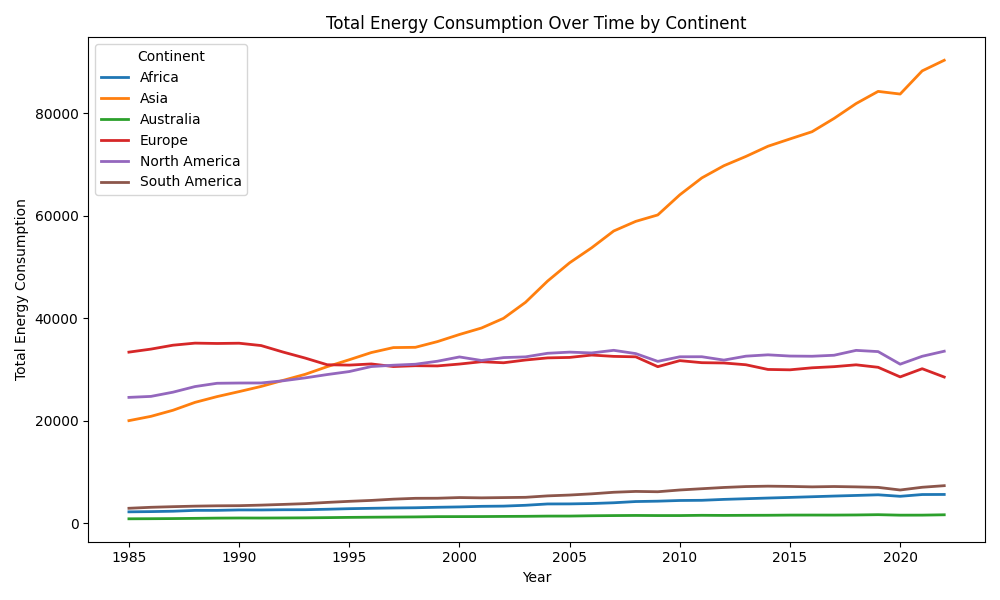

In [193]:
# Plotting the line plot by continent using Matplotlib
plt.figure(figsize=(10, 6))  # Set figure size

# Loop through each continent and plot its line
for continent in six_continents['continent'].unique():
    continent_data = six_continents[six_continents['continent'] == continent]
    plt.plot(continent_data['year'], continent_data['Total Energy Consumption'], label=continent, linewidth=2)

# Add title and labels
plt.title("Total Energy Consumption Over Time by Continent")
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')

# Show legend to identify the continents
plt.legend(title='Continent')

# Display the plot
plt.tight_layout()
plt.show()

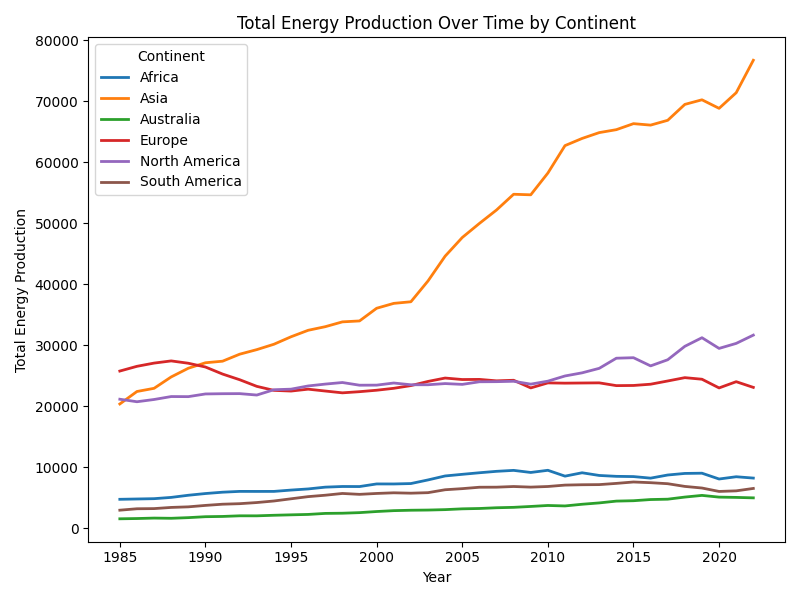

In [194]:
# Plotting the line plot by continent using Matplotlib
plt.figure(figsize=(8, 6))  # Set figure size

# Loop through each continent and plot its line
for continent in six_continents['continent'].unique():
    continent_data = six_continents[six_continents['continent'] == continent]
    plt.plot(continent_data['year'], continent_data['Total Energy Production'], label=continent, linewidth=2)

# Add title and labels
plt.title("Total Energy Production Over Time by Continent")
plt.xlabel('Year')
plt.ylabel('Total Energy Production')

# Show legend to identify the continents
plt.legend(title='Continent')

# Display the plot
plt.tight_layout()
plt.show()

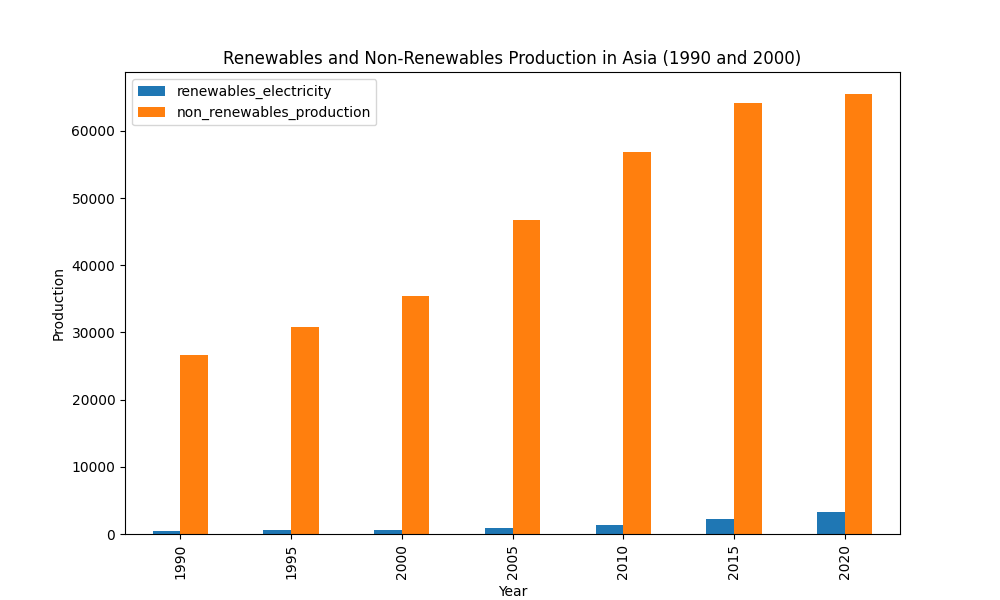

In [195]:
#Filter for Asia and the relevant columns
asia_data = six_continents[(six_continents['continent'] == 'Asia') & 
                           ((six_continents['year'] == 1990)|
                            (six_continents['year'] == 1995)| 
                            (six_continents['year'] == 2000)|
                             (six_continents['year'] == 2005)|
                            (six_continents['year'] == 2010)|
                            (six_continents['year'] == 2015)|
                            (six_continents['year'] == 2020))]

# Group by year and sum production values
asia_grouped = asia_data.groupby('year')[['renewables_electricity', 'non_renewables_production']].sum()

# Plot
asia_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Renewables and Non-Renewables Production in Asia (1990 and 2000)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

In [196]:
# Filter data for the year 2020
year_2022_data = six_continents[six_continents['year'] == 2022]

# Plot coal consumption for 2022 by continent
consumption_2022_plot = year_2022_data.hvplot.bar(
    x='continent', y='coal_consumption', 
    title="Coal Consumption by Continent in 2022",
    xlabel='Continent', ylabel='Coal Consumption',
    color='blue', height=400, width=600
)

# Plot coal production for 2020 by continent
production_2022_plot = year_2022_data.hvplot.bar(
    x='continent', y='coal_production', 
    title="Coal Production by Continent in 2022",
    xlabel='Continent', ylabel='Energy Production',
    color='green', height=400, width=600
)

(consumption_2022_plot + production_2022_plot).cols(1)

:Layout
   .Bars.I  :Bars   [continent]   (coal_consumption)
   .Bars.II :Bars   [continent]   (coal_production)

In [197]:
# Renewables vs non-renewables energy consumption per continent
energy_mix_plot = year_2022_data.hvplot.bar(
    x='continent', y=['renewables_consumption', 'non_renewables_consumption'], 
    stacked=True, title="Energy Mix by Continent in 2022",
    xlabel='Continent', ylabel='Energy Source Contribution',
    height=400, width=800
)
energy_mix_plot

:Bars   [continent,Variable]   (value)

In [167]:
# Filter data for the year 2020
year_2022_country_df = top_country_df[top_country_df['year'] == 2022]

# Plot coal consumption for 2022 by continent
consumption_2022_country_plot = year_2022_country_df.hvplot.bar(
    x='country', y='coal_consumption', 
    title="Coal Consumption by Continent in 2022",
    xlabel='Country', ylabel='Coal Consumption',
    color='blue', height=400, width=600
)

# Plot coal production for 2020 by continent
production_2022_country_plot = year_2022_country_df.hvplot.bar(
    x='country', y='coal_production', 
    title="Coal Production by Continent in 2022",
    xlabel='Country', ylabel='Energy Production',
    color='green', height=400, width=600
)

(consumption_2022_country_plot + production_2022_country_plot).cols(1)

:Layout
   .Bars.I  :Bars   [country]   (coal_consumption)
   .Bars.II :Bars   [country]   (coal_production)

In [168]:
# Renewables vs non-renewables energy consumption for Top 20 countries
energy_mix_plot_country = year_2022_country_df.hvplot.bar(
    x='country', y=['renewables_consumption', 'non_renewables_consumption'], 
    stacked=True, title="Energy Mix by Country in 2022",
    xlabel='Country', ylabel='Energy Source Contribution',
    height=400, width=1200,
    rot=90
)
energy_mix_plot_country

:Bars   [country,Variable]   (value)